## Bias Estimation Plots

### Initialization 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os.path
import astropy.table
import astropy.io.fits as fits

### Read Simulation Outputs 

In [3]:
output_catalog_path = '..'
def locate(name): return os.path.join(output_catalog_path,'%s.fits' % name)

In [5]:
lsst_i = fits.open(locate('lsst_i'))

In [6]:
#some interesting subsets of the simulation
cat = astropy.table.Table.read(lsst_i,hdu=1)
iso_gal = cat[cat['grp_size'] == 1] #isolated galaxies
grp_gal = cat[cat['grp_size'] != 1] #galaxies in a group of 2 or more. 

#'good' galaxies satisfy the reasonable criteron below 
good = cat[(cat['snr_iso'] > 10) & (cat['sigma_m'] > .2)]
iso_galg  = iso_gal[(iso_gal['snr_iso'] > 10) & (iso_gal['sigma_m'] > .2)] #'good' isolated galaxies
grp_galg  = grp_gal[(grp_gal['snr_grp'] > 10 )& (grp_gal['sigma_m'] > .2)] #'good' non isolated galaxies.

#gold sample galaxies 
gold = cat[(cat['ab_mag'] < 25.3)] 
iso_gold = iso_gal[(iso_gal['ab_mag'] < 25.3)] #isolated galaxies in the gold sample 
grp_gold = grp_gal[(grp_gal['ab_mag'] < 25.3)] #non isolated galaxies in the gold sample

In [7]:
#number of galaxies in each category
print 'total number of galaxies is {0}'.format(len(cat))
print 'total number of isolated galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(iso_gal), float(len(iso_gal))/len(cat)*100)
print 'total number of non-isolated galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(grp_gal), float(len(grp_gal))/len(cat)*100)
print 'total number of good galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(good), float(len(good))/len(cat)*100)
print 'total number of good isolated galaxies is {0}, they constitute {1:.2f}% of the isolated galaxies, and {2:.2f}% of the total.'.format(len(iso_galg),float(len(iso_galg))/len(iso_gal)*100, float(len(iso_galg))/len(cat)*100)
print 'total number of good non-isolated galaxies is {0}, they constitute {1:.2f}% of the non-isolated galaxies, and {2:.2f}% of the total.'.format(len(grp_galg), float(len(grp_galg))/len(grp_gal)*100,  float(len(grp_galg))/len(cat)*100)
print 'total number of gold galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(gold), float(len(gold))/len(cat)*100)
print 'total number of gold isolated galaxies is {0}, they constitute {1:.2f}% of the isolated galaxies, and {2:.2f}% of the total.'.format(len(iso_gold),float(len(iso_gold))/len(iso_gal)*100, float(len(iso_gold))/len(cat)*100)
print 'total number of gold non-isolated galaxies is {0}, they constitute {1:.2f}% of the non-isolated galaxies, and {2:.2f}% of the total.'.format(len(grp_gold),float(len(grp_gold))/len(grp_gal)*100, float(len(grp_gold))/len(cat)*100)


total number of galaxies is 45289
total number of isolated galaxies is 8909, they constitute 19.67% of the total.
total number of non-isolated galaxies is 36380, they constitute 80.33% of the total.
total number of good galaxies is 10400, they constitute 22.96% of the total.
total number of good isolated galaxies is 792, they constitute 8.89% of the isolated galaxies, and 1.75% of the total.
total number of good non-isolated galaxies is 9537, they constitute 26.21% of the non-isolated galaxies, and 21.06% of the total.
total number of gold galaxies is 10658, they constitute 23.53% of the total.
total number of gold isolated galaxies is 782, they constitute 8.78% of the isolated galaxies, and 1.73% of the total.
total number of gold non-isolated galaxies is 9876, they constitute 27.15% of the non-isolated galaxies, and 21.81% of the total.


### Blended vs unblended biases on shear measurements

In [22]:
#produce different plots with the biases calculated from the fisher formalism. 
def shear_biases_plots(cat,good,gold,save=None):
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 2,3
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(cat['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(cat['bias_g1_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g1_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 for all galaxies',fontsize=14)
    plt.xlabel('bias on g1',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 2) 
    plt.hist(good['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(good['bias_g1_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g1_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 for good galaxies',fontsize=14)
    plt.xlabel('bias on g1 ',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 3) 
    plt.hist(gold['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(gold['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g1_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 for gold galaxies',fontsize=14)
    plt.xlabel('bias on g1',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 4) 
    plt.hist(cat['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g2')
    plt.hist(cat['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g2 for all galaxies',fontsize=14)
    plt.xlabel('bias on g2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 5) 
    plt.hist(good['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g2')
    plt.hist(good['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g2 for good galaxies',fontsize=14)
    plt.xlabel('bias on g2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 6) 
    plt.hist(gold['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g2')
    plt.hist(gold['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g2 for gold galaxies',fontsize=14)
    plt.xlabel('bias on g2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)


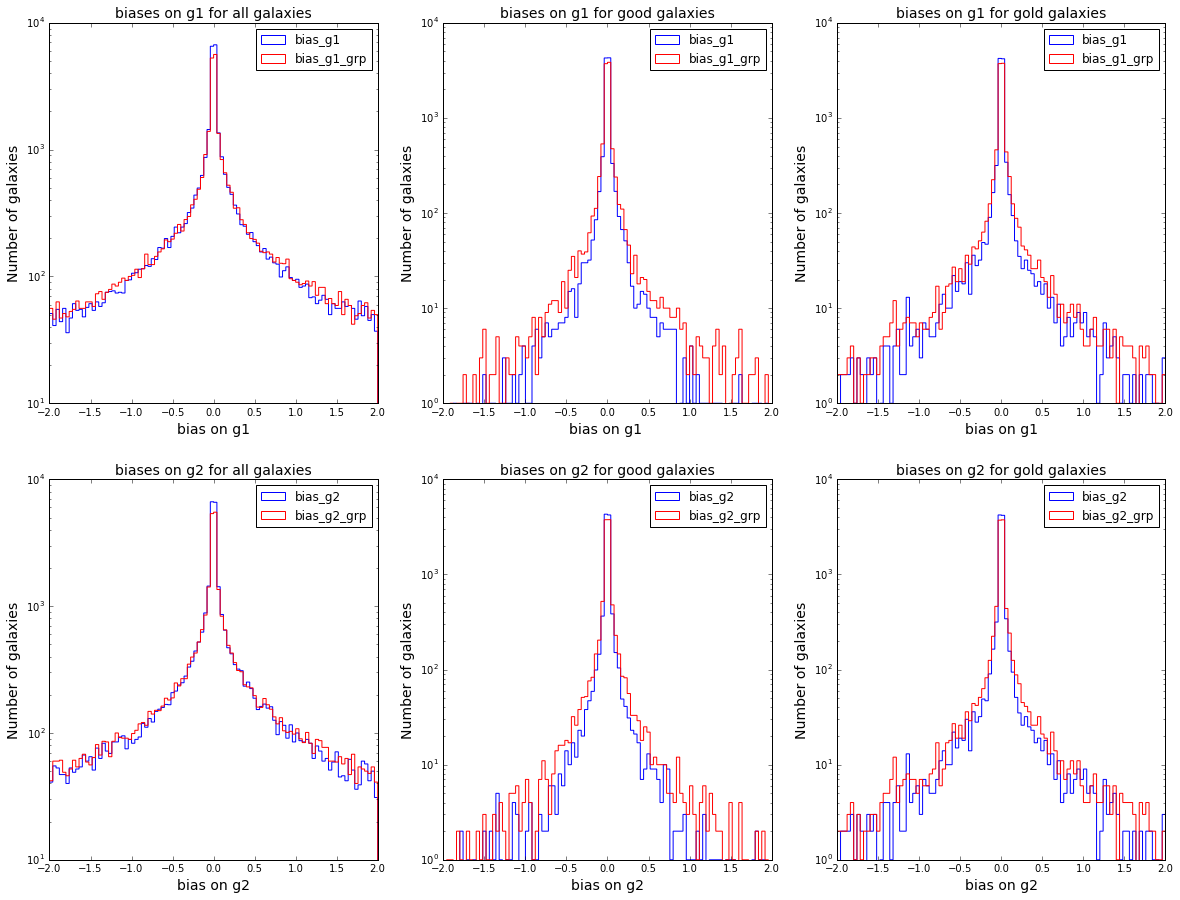

In [23]:
shear_biases_plots(cat,good,gold)

### Scatter plots of biases

In [24]:
#scatter plot of bias_g vs bias_g_grp 
def scatter_shear_plots(cat,good,gold, save=None):
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,20))
    nrow,ncol = 2,3
    #
    plt.subplot(nrow, ncol, 1, aspect='equal') 
    plt.scatter(cat['bias_g1'],cat['bias_g1_grp'],alpha=.3)
    plt.title('scatter of biases for all galaxies',fontsize=14)
    plt.xlabel('bias_g1',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g1_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 2,aspect='equal') 
    plt.scatter(good['bias_g1'],good['bias_g1_grp'],alpha=.3)
    plt.title('scatter of biases for good galaxies',fontsize=14)
    plt.xlabel('bias_g1',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g1_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 3,aspect='equal') 
    plt.scatter(gold['bias_g1'],gold['bias_g1_grp'],alpha=.3)
    plt.title('scatter of biases for gold galaxies',fontsize=14)
    plt.xlabel('bias_g1',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g1_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 4,aspect='equal') 
    plt.scatter(cat['bias_g2'],cat['bias_g2_grp'],alpha=.3)
    plt.title('scatter of biases for all galaxies',fontsize=14)
    plt.xlabel('bias_g2',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g2_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 5,aspect='equal')
    plt.scatter(good['bias_g2'],good['bias_g2_grp'],alpha=.3)
    plt.title('scatter of biases for good galaxies',fontsize=14)
    plt.xlabel('bias_g2',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g2_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 6,aspect='equal') 
    plt.scatter(gold['bias_g2'],gold['bias_g2_grp'],alpha=.3)
    plt.title('scatter of biases for gold galaxies',fontsize=14)
    plt.xlabel('bias_g2',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g2_grp',fontsize=14)

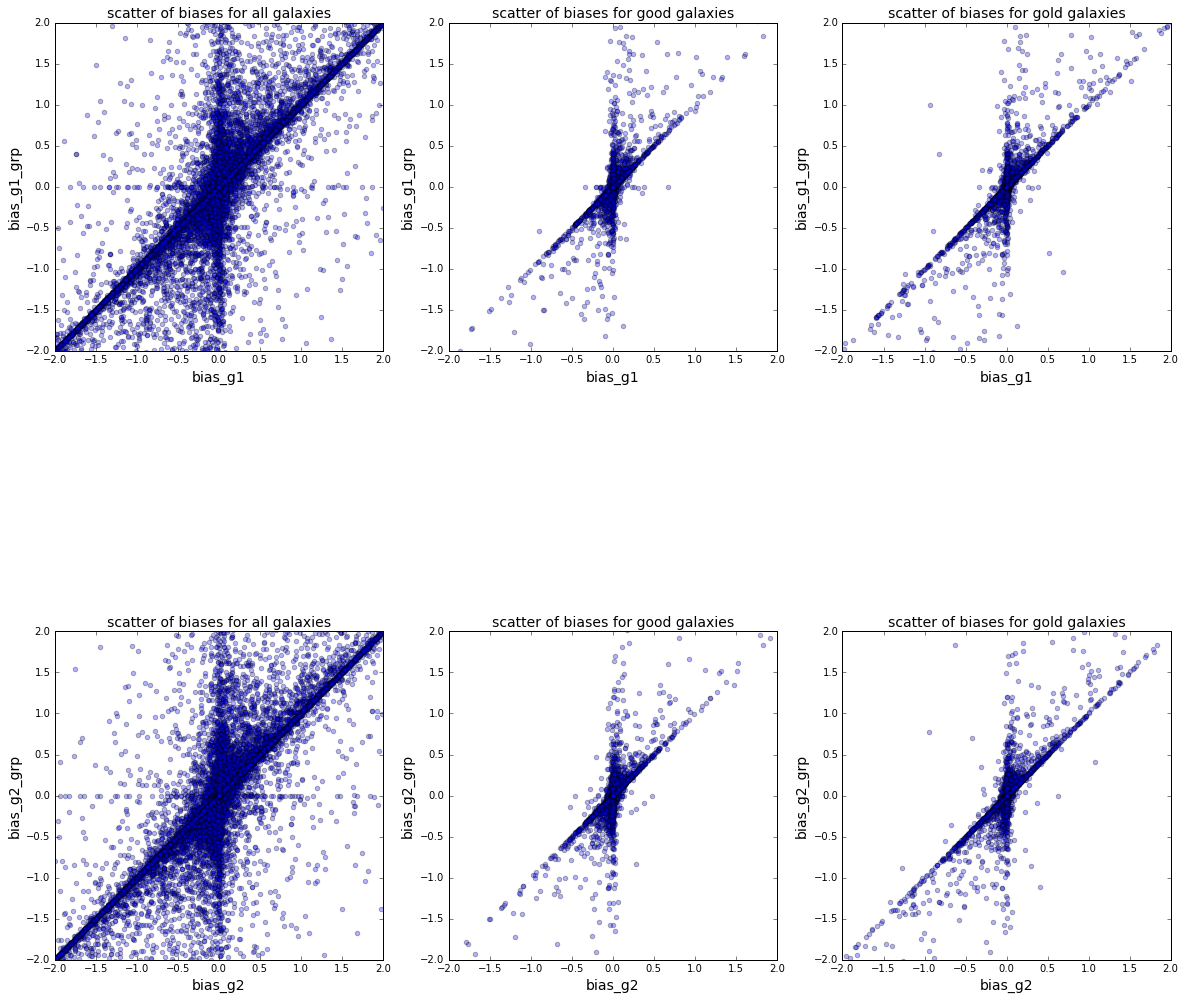

In [25]:
scatter_shear_plots(cat,good,gold)

### Purity and Unblended Bias on Shear Plots 

In [30]:
#some plot from the notebook ShearEstimatorPlots using biases from the Fisher Formalism. 
#made a cut on biases for g1 and g2 in range (-2,2)
def purity_bias_shears(cat,good, gold, save=None):
    selected_cat = (cat['bias_g1'] < 2.) & (cat['bias_g1'] > -2.) & (cat['bias_g2'] < 2.) & (cat['bias_g2'] > -2.) #makes plot more feasible
    selected_good = (good['bias_g1'] < 2.) & (good['bias_g1'] > -2.) & (good['bias_g2'] < 2.) & (good['bias_g2'] > -2.)
    selected_gold = (gold['bias_g1'] < 2.) & (gold['bias_g1'] > -2.) & (gold['bias_g2'] < 2.) & (gold['bias_g2'] > -2.)
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 3,5
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(cat['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(cat['bias_g2'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for all galaxies',fontsize=14)
    plt.xlabel('bias on g1,2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,2, aspect='equal')
    plt.plot(cat['bias_g1'],cat['bias_g2'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1',fontsize=14)
    plt.ylabel('bias_g2',fontsize=14)
    plt.grid()
    #
    plt.subplot(nrow,ncol,3)
    plt.hist(cat['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for all galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,4)
    plt.plot(cat['purity'],cat['bias_g1'],'r+',label='bias_g1')
    plt.plot(cat['purity'],cat['bias_g2'],'bx',label='bias_g2')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('bias_g1,2',fontsize=14)
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,5)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (cat[selected_cat]['purity'] >= xlo) & (cat[selected_cat]['purity'] < xhi)
        dg1 = cat[selected_cat]['bias_g1'][in_range]
        dg2 = cat[selected_cat]['bias_g2'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Bias covariance',fontsize=14)
    plt.axhline(0,color='green')
    ##
    plt.tight_layout()

    #
    
    plt.subplot(nrow, ncol, 6) 
    plt.hist(good['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(good['bias_g2'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for good galaxies')
    plt.xlabel('bias on g1,2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,7, aspect='equal')
    plt.plot(good['bias_g1'],good['bias_g2'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1',fontsize=14)
    plt.ylabel('bias_g2',fontsize=14)
    plt.grid()
    #
    plt.subplot(nrow,ncol,8)
    plt.hist(good['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for good galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,9)
    plt.plot(good['purity'],good['bias_g1'],'r+',label='bias_g1')
    plt.plot(good['purity'],good['bias_g2'],'bx',label='bias_g2')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('bias_g1,2',fontsize=14)
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,10)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (good[selected_good]['purity'] >= xlo) & (good[selected_good]['purity'] < xhi)
        dg1 = good[selected_good]['bias_g1'][in_range]
        dg2 = good[selected_good]['bias_g2'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('biases covariance',fontsize=14)
    plt.axhline(0,color='green')


    ##
    plt.tight_layout()

    #
    
    plt.subplot(nrow, ncol, 11) 
    plt.hist(gold['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(gold['bias_g2'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for gold galaxies')
    plt.xlabel('bias on g1,2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,12, aspect='equal')
    plt.plot(gold['bias_g1'],gold['bias_g2'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1',fontsize=14)
    plt.ylabel('bias_g2',fontsize=14)
    plt.grid()
    #
    plt.subplot(nrow,ncol,13)
    plt.hist(gold['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for gold galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,14)
    plt.plot(gold['purity'],gold['bias_g1'],'r+',label='bias_g1')
    plt.plot(gold['purity'],gold['bias_g2'],'bx',label='bias_g2')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('bias_g1,2',fontsize=14)
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,15)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (gold[selected_gold]['purity'] >= xlo) & (gold[selected_gold]['purity'] < xhi)
        dg1 = gold[selected_gold]['bias_g1'][in_range]
        dg2 = gold[selected_gold]['bias_g2'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('biases covariance',fontsize=14)
    plt.axhline(0,color='green')


    ##
    plt.tight_layout()

[ 0.56854935  0.55632243  0.51729153  0.50290041  0.53387756  0.47510701
  0.49403489  0.44367833  0.43111137  0.43082563  0.39226058  0.3743583 ]
[ 0.55547478  0.51696319  0.50727698  0.48129844  0.5120069   0.45024068
  0.48205417  0.43944758  0.44534097  0.43355913  0.37797598  0.3755054 ]
[-0.065825    0.11289692 -0.01798482 -0.06923703 -0.08759006  0.09107428
  0.07376644 -0.08073167 -0.04703845 -0.05215479 -0.01842952 -0.02670998]
[ 0.09318172  0.12778491  0.15398132  0.17598176  0.14296162  0.181126
  0.12437208  0.10175301  0.13772872  0.13756327  0.1264847   0.10742438]
[ 0.20714395  0.10760429  0.16591926  0.13420629  0.17022466  0.13829139
  0.14081187  0.12515262  0.12963817  0.14799102  0.10347825  0.10900478]
[-0.19478903  0.14962203 -0.23336396 -0.18750105 -0.17687801  0.03617396
 -0.34834087 -0.56791854 -0.17369574 -0.03517972 -0.33307577 -0.00786296]
[ 0.22134025  0.12908219  0.18289994  0.20023862  0.20034775  0.16860479
  0.2306741   0.20796929  0.2092025   0.1953324

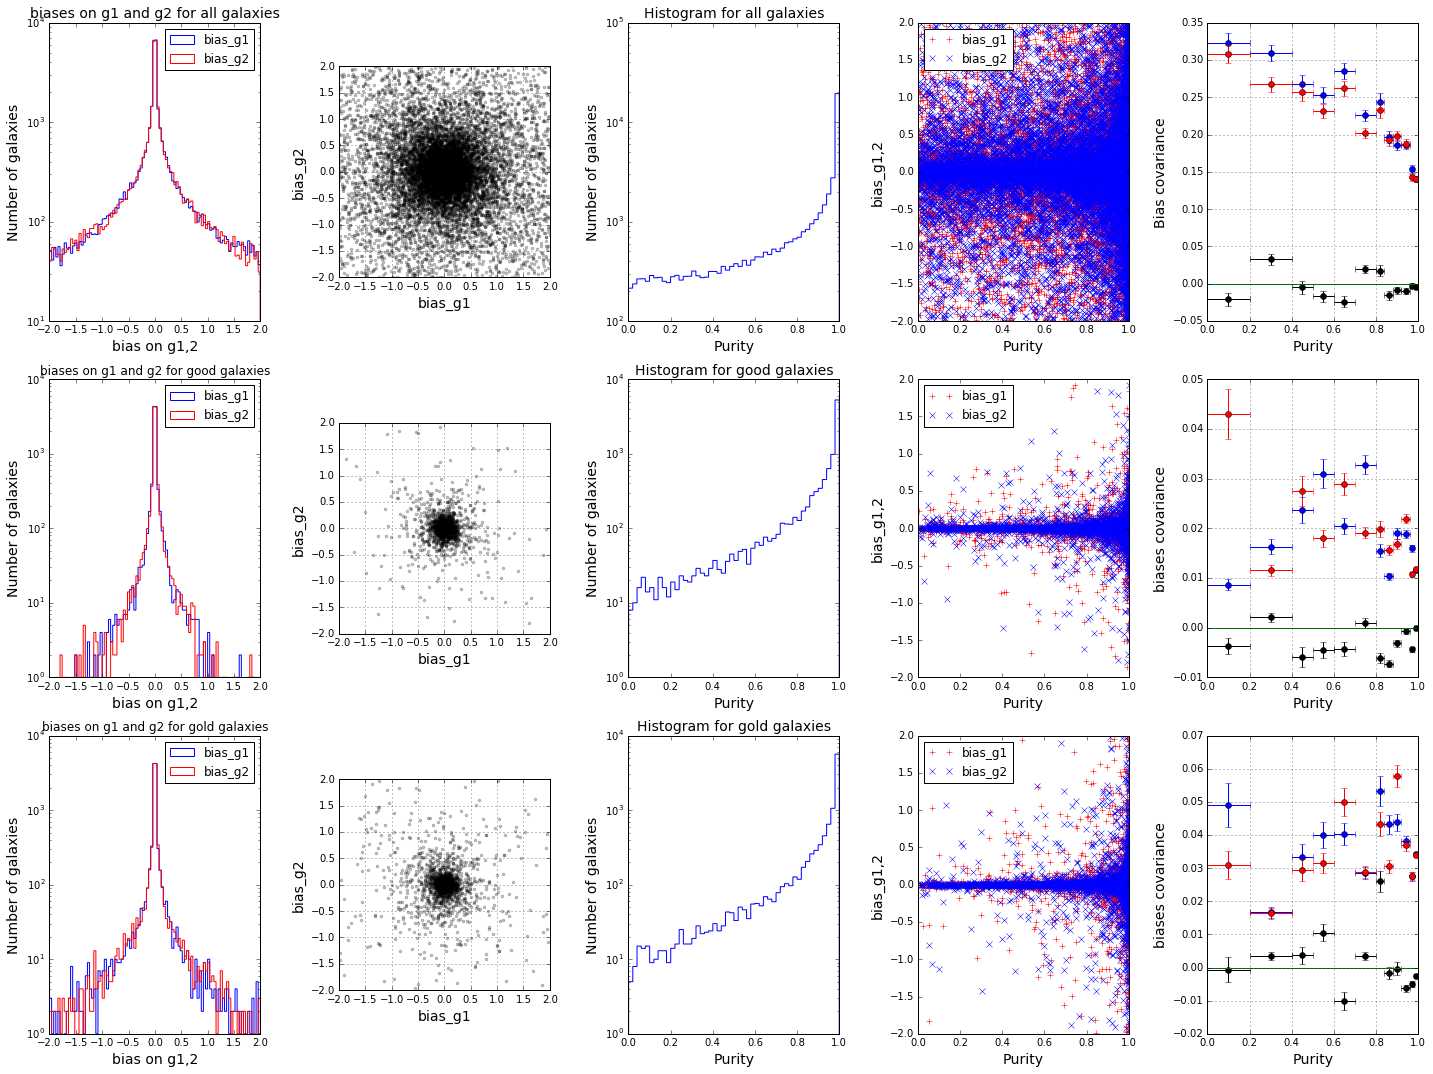

In [31]:
purity_bias_shears(cat, good, gold)

### Purity and Blended Bias on Shear Plots 

In [28]:
#some plot from the notebook ShearEstimatorPlots using biases from the Fisher Formalism. 
#made a cut on biases for g1 and g2 in range (-2,2)
def purity_biasgrp_shears(cat,good, gold, save=None):
    selected_cat = (cat['bias_g1_grp'] < 2.) & (cat['bias_g1_grp'] > -2.) & (cat['bias_g2_grp'] < 2.) & (cat['bias_g2_grp'] > -2.) #makes plot more feasible
    selected_good = (good['bias_g1_grp'] < 2.) & (good['bias_g1_grp'] > -2.) & (good['bias_g2_grp'] < 2.) & (good['bias_g2_grp'] > -2.)
    selected_gold = (gold['bias_g1_grp'] < 2.) & (gold['bias_g1_grp'] > -2.) & (gold['bias_g2_grp'] < 2.) & (gold['bias_g2_grp'] > -2.)
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 3,5
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(cat['bias_g1_grp'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1_grp')
    plt.hist(cat['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for all galaxies',fontsize=14)
    plt.xlabel('bias on g1,2_grp',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,2, aspect='equal')
    plt.plot(cat['bias_g1_grp'],cat['bias_g2_grp'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1_grp')
    plt.ylabel('bias_g2_grp')
    plt.grid()
    #
    plt.subplot(nrow,ncol,3)
    plt.hist(cat['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for all galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,4)
    plt.plot(cat['purity'],cat['bias_g1_grp'],'r+',label='bias_g1_grp')
    plt.plot(cat['purity'],cat['bias_g2_grp'],'bx',label='bias_g2_grp')
    plt.xlabel('Purity')
    plt.ylabel('bias_g1,2_grp')
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,5)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (cat[selected_cat]['purity'] >= xlo) & (cat[selected_cat]['purity'] < xhi)
        dg1 = cat[selected_cat]['bias_g1_grp'][in_range]
        dg2 = cat[selected_cat]['bias_g2_grp'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity')
    plt.ylabel('Bias covariance')
    plt.axhline(0,color='green')
    ##
    plt.tight_layout()

    #
    
    plt.subplot(nrow, ncol, 6) 
    plt.hist(good['bias_g1_grp'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1_grp')
    plt.hist(good['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for good galaxies')
    plt.xlabel('bias on g1,2_grp',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,7, aspect='equal')
    plt.plot(good['bias_g1_grp'],good['bias_g2_grp'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1_grp')
    plt.ylabel('bias_g2_grp')
    plt.grid()
    #
    plt.subplot(nrow,ncol,8)
    plt.hist(good['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for good galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,9)
    plt.plot(good['purity'],good['bias_g1_grp'],'r+',label='bias_g1_grp')
    plt.plot(good['purity'],good['bias_g2_grp'],'bx',label='bias_g2_grp')
    plt.xlabel('Purity')
    plt.ylabel('bias_g1,2_grp')
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,10)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (good[selected_good]['purity'] >= xlo) & (good[selected_good]['purity'] < xhi)
        dg1 = good[selected_good]['bias_g1_grp'][in_range]
        dg2 = good[selected_good]['bias_g2_grp'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity')
    plt.ylabel('biases covariance')
    plt.axhline(0,color='green')
    ##
    plt.tight_layout()

    #
    
    plt.subplot(nrow, ncol, 11) 
    plt.hist(gold['bias_g1_grp'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1_grp')
    plt.hist(gold['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for gold galaxies')
    plt.xlabel('bias on g1,2_grp',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,12, aspect='equal')
    plt.plot(gold['bias_g1_grp'],gold['bias_g2_grp'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1_grp')
    plt.ylabel('bias_g2_grp')
    plt.grid()
    #
    plt.subplot(nrow,ncol,13)
    plt.hist(gold['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for gold galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,14)
    plt.plot(gold['purity'],gold['bias_g1_grp'],'r+',label='bias_g1_grp')
    plt.plot(gold['purity'],gold['bias_g2_grp'],'bx',label='bias_g2_grp')
    plt.xlabel('Purity')
    plt.ylabel('bias_g1,2_grp')
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,15)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (gold[selected_gold]['purity'] >= xlo) & (gold[selected_gold]['purity'] < xhi)
        dg1 = gold[selected_gold]['bias_g1_grp'][in_range]
        dg2 = gold[selected_gold]['bias_g2_grp'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity')
    plt.ylabel('biases covariance')
    plt.axhline(0,color='green')
    ##
    plt.tight_layout()

[ 0.6925036   0.64705851  0.62400997  0.60267859  0.60603527  0.52923973
  0.52827816  0.49063783  0.48459564  0.47115458  0.40652663  0.37269619]
[ 0.69615424  0.62872532  0.61436862  0.59283001  0.57922975  0.52294542
  0.54195124  0.47094014  0.49567383  0.47545276  0.39046909  0.37922746]
[-0.10737501  0.02966874  0.03157015 -0.06430672 -0.03220666  0.00235803
  0.06625073 -0.095943   -0.02862371 -0.04304467  0.00889807 -0.03269125]
[ 0.43947282  0.28655533  0.36589076  0.31092415  0.34400927  0.27932054
  0.20293845  0.18020892  0.21978899  0.18612921  0.13868592  0.10814932]
[ 0.42081422  0.33225959  0.31337536  0.26728049  0.32192499  0.23935737
  0.19973219  0.19551684  0.19673478  0.18950001  0.11461632  0.11473807]
[-0.26675641 -0.0300084   0.0848867   0.03274645  0.11189781 -0.13116467
 -0.00601685 -0.05395862 -0.00344529  0.02295018 -0.15455921  0.02382212]
[ 0.30991026  0.28980396  0.30801475  0.33591087  0.33701314  0.25032913
  0.23799338  0.24971559  0.21875657  0.25529

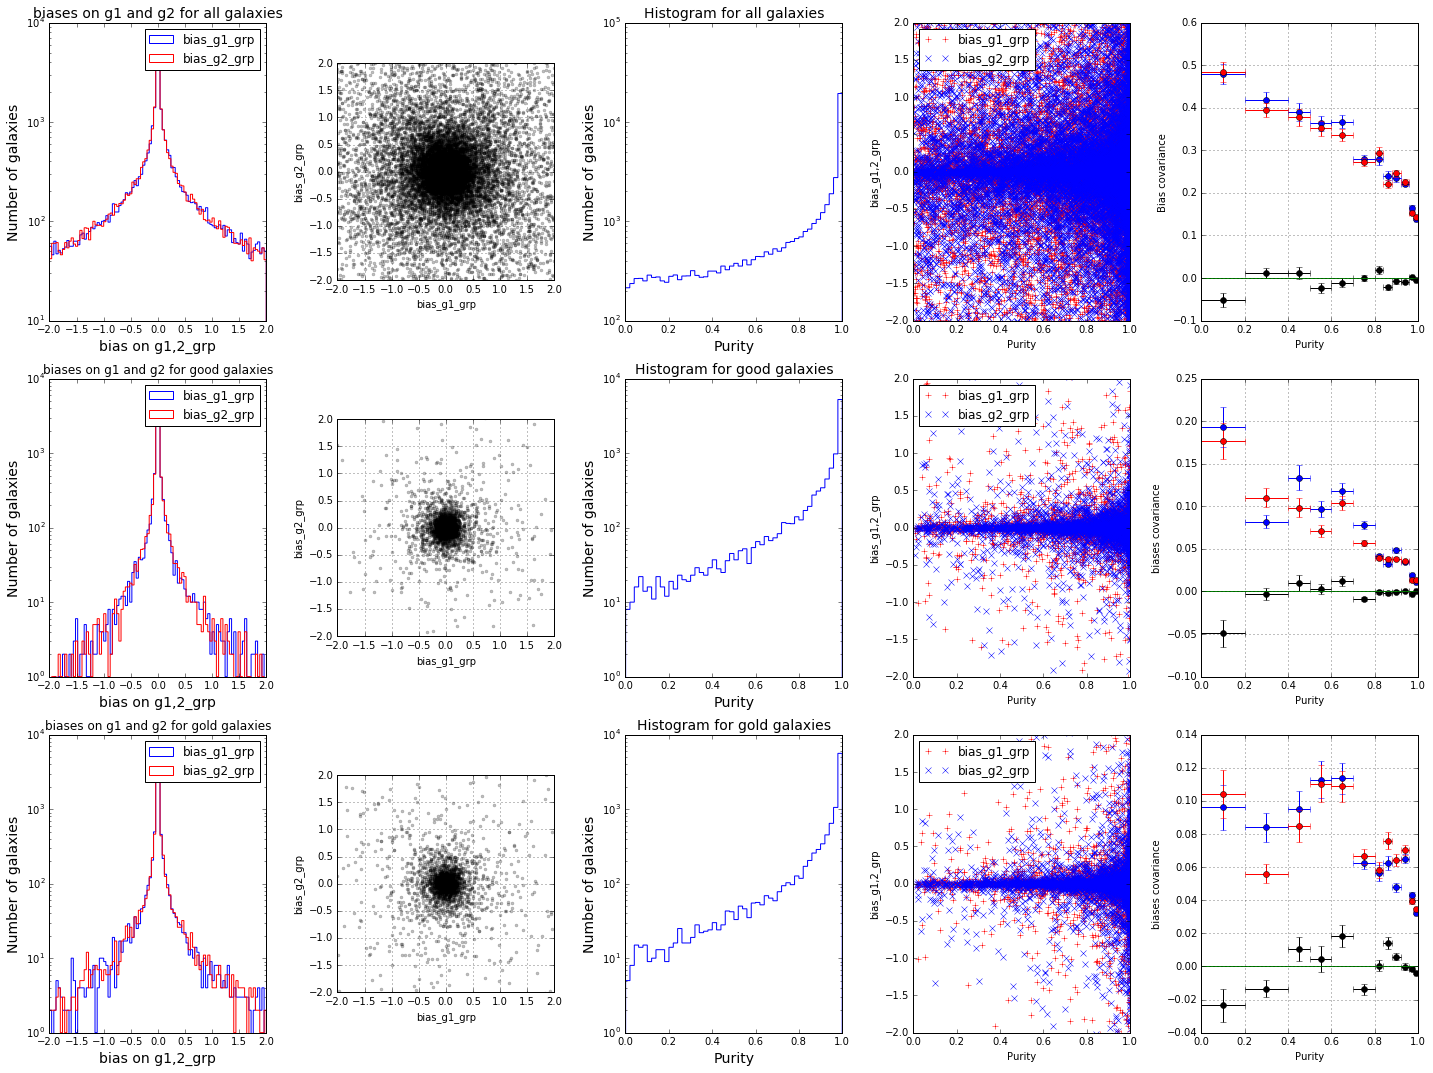

In [29]:
purity_biasgrp_shears(cat, good, gold)

### Biases of flux measurement 

In [84]:
#similar plots but with bias on flux
def flux_biases_plots(cat,save=None):
    f_min = -3
    f_max = 3
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 1,3
    frac_bflux = cat['bias_f']/cat['flux']
    frac_bflux_grp = cat['bias_f_grp']/cat['flux']
    frac_bflux_g = good['bias_f']/good['flux']
    frac_bflux_grpg = good['bias_f_grp']/good['flux']
    frac_bflux_gold = gold['bias_f']/gold['flux']
    frac_bflux_grpgold = gold['bias_f_grp']/gold['flux']
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(frac_bflux,range=[f_min,f_max],bins=100,histtype='step',label='bias_f/flux')
    plt.hist(frac_bflux_grp,range=[f_min,f_max],bins=100,color='red',histtype='step',label='bias_f_grp/flux')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on flux for all galaxies')
    plt.xlabel('bias on flux',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 2) 
    plt.hist(frac_bflux_g,range=[f_min,f_max],bins=100,histtype='step',label='bias_f/flux')
    plt.hist(frac_bflux_grpg,range=[f_min,f_max],bins=100,color='red',histtype='step',label='bias_f_grp/flux')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on flux for good galaxies')
    plt.xlabel('bias on flux',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 3) 
    plt.hist(frac_bflux_gold,range=[f_min,f_max],bins=100,histtype='step',label='bias_f/flux')
    plt.hist(frac_bflux_grpgold,range=[f_min,f_max],bins=100,color='red',histtype='step',label='bias_f_grp/flux')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on flux for gold galaxies')
    plt.xlabel('bias on flux',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)


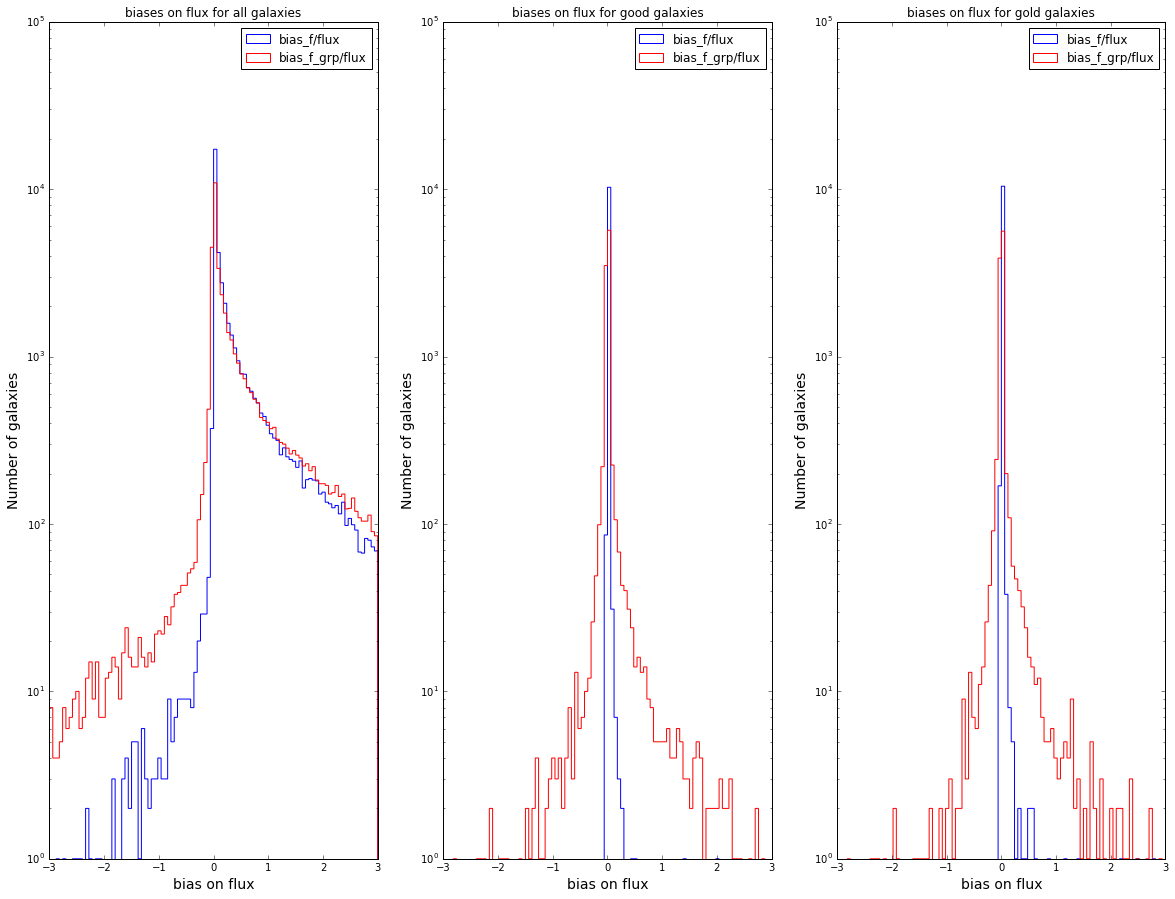

In [85]:
flux_biases_plots(cat)